In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import os

In [4]:
d = pd.read_excel("new-telecom.xlsx")

In [5]:
d.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [7]:
d.TotalCharges = pd.to_numeric(d.TotalCharges,errors='coerce')
d.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
from sklearn import preprocessing
category_col =['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService','OnlineSecurity',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
              'Churn','OnlineBackup','Churn']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    d[col] = labelEncoder.fit_transform(d[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 


{'gender': {'Female': 0, 'Male': 1}, 'Partner': {'No': 0, 'Yes': 1}, 'Dependents': {'No': 0, 'Yes': 1}, 'PhoneService': {'No': 0, 'Yes': 1}, 'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2}, 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2}, 'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'TechSupport': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'StreamingTV': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'StreamingMovies': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2}, 'PaperlessBilling': {'No': 0, 'Yes': 1}, 'PaymentMethod': {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}, 'Churn': {0: 0, 1: 1}, 'OnlineBackup': {'No': 0, 'No internet service': 1, 'Yes': 2}}


In [9]:
d= d.drop(['customerID'], axis = 1) 
d= d.drop(['TotalCharges'], axis = 1) 

In [10]:
d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
1,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
2,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,1
3,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,1
4,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,1


In [11]:
d.shape

(100, 19)

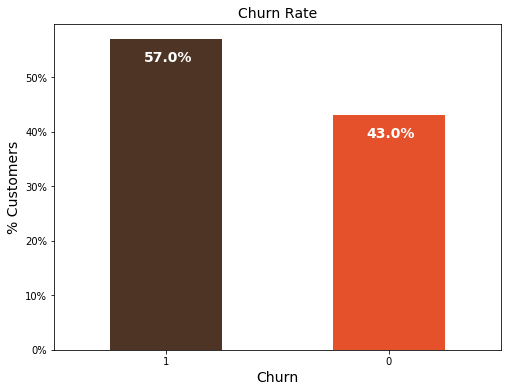

In [12]:

colors = ['#4D3425','#E4512B']
ax = (d['Churn'].value_counts()*100.0 /len(d)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                         color = colors ,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [13]:
#Machine Learning Model

In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
X = d.values[:, 0:18] 
y = d.values[:, 18] 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\Daksh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))
print (metrics.f1_score(y_test, prediction_test))

0.8666666666666667
0.9047619047619048


In [19]:
import pickle
from flask import Flask, request, jsonify, render_template


In [2]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model, 'model.pkl') 
  
# Load the model from the file 
from_joblib = joblib.load('model.pkl')  
  
# Use the loaded model to make predictions 
from_joblib.predict(X_test) 

C:\Users\Daksh\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


NameError: name 'model' is not defined

In [ ]:
d.shape

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
X = d.drop(columns = ['Churn'])

In [ ]:
weights = pd.Series(model.coef_[0],index=X.columns.values)
print (weights.sort_values(ascending = False)[:19].plot(kind='bar'))
plt.gcf().set_size_inches(11,6)
plt.savefig('plt.png')

In [1]:
def ValuePredictor(to_predict_list): 
    to_predict = np.array(to_predict_list).reshape(1, 12) 
    loaded_model = pickle.load(open("model.pkl", "rb")) 
    result = loaded_model.predict(to_predict) 
    return result[0] 
  
app = Flask(__name__)
@app.route('result.html', methods = ['POST']) 
def result(): 
    if request.method == 'POST': 
        to_predict_list = request.form.to_dict() 
        to_predict_list = list(to_predict_list.values()) 
        to_predict_list = list(map(int, to_predict_list)) 
        result = ValuePredictor(to_predict_list)         
        if int(result)== 1: 
            prediction ='It will stay'
        else: 
            prediction ='It is will the company'            
        return render_template("Index.html", prediction = prediction) 

NameError: name 'Flask' is not defined

In [ ]:
flask run